The first step in our exploratory analysis is to load the data set. The training data set is in a json format so we will use the pandas package functions to read the file. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", color_codes=True)
sns.palplot(sns.color_palette("RdBu", n_colors=7))

fileName = "C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\train.json\\train.json"
train_df = pd.read_json(fileName)

train_df.head()


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


We can see from the print out tha that the dataset contains the 15 initilaly described variables. Further we can see 

In [9]:

train_df.shape

(49352, 15)

As a next step we will permorm some exploratory analysis on the variables provided in the data set. We have 14 independent variables provided in the dataset. Our dependent variable is called an interest_level and represents the levels in which the 

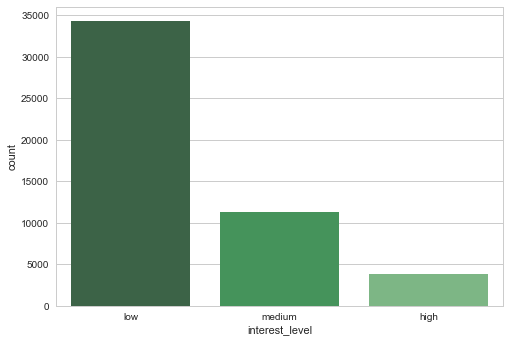

In [19]:
sns.countplot(x="interest_level", data=train_df, palette="Greens_d", order = ["low", "medium", "high"]);

plt.show()

We can see that the rental listing with low interest represent the majority of the rental listings in the dataset. The next are the rental listings with medium level of interest and the minority are the listings with high level of interest. We will also look at the distribution of the independent variables and how the independent variables relate to our target variable.

As we already noted we have a couple of numeric variables. We will explore the numer of bedrooms, number of bathrooms and price together.

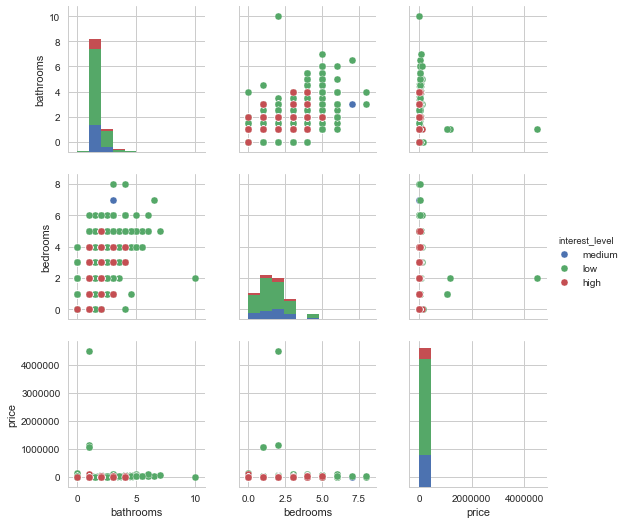

In [54]:

sns.pairplot(train_df[['bathrooms','bedrooms', 'price', "interest_level"]], hue="interest_level")

plt.show()

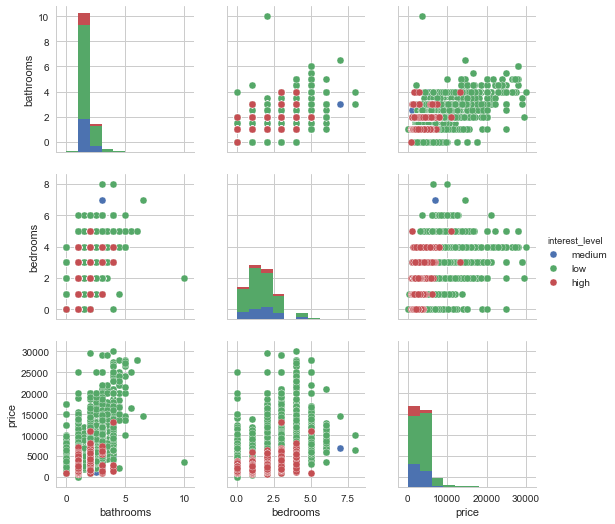

In [4]:
train_clean_df = train_df[train_df['price'] < 30000]

sns.pairplot(train_clean_df[['bathrooms','bedrooms', 'price', "interest_level"]], hue="interest_level")

plt.show()

Based on the plots, we can see that the majority of the rental units have 2 bathrooms with some rentals having 3 bathrooms. The bedrooms vary more compared to the bathrooms and range between 0 and 8. There is some correlation existing between the number of bedrooms and number of bathrooms. With the increase in the number of bedrooms we can observe an increase in the number of bedrooms. From the price variable, we can see that there are a umber of outliers with extremely high rent. In the future analysis, we may consider removing the outliers in order to improve our model.

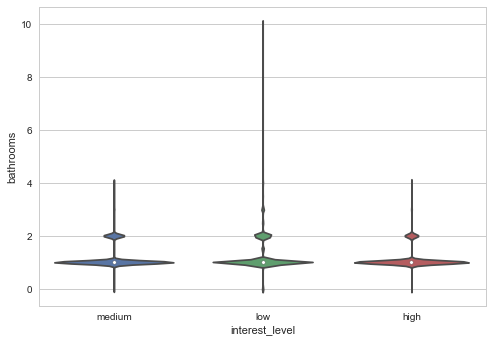

In [9]:
sns.violinplot(x="interest_level", y="bathrooms", data=train_clean_df);
plt.show()

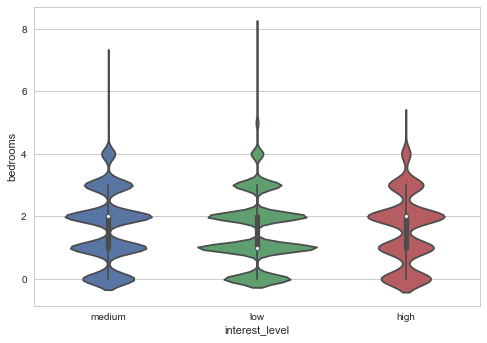

In [10]:
sns.violinplot(x="interest_level", y="bedrooms", data=train_clean_df);
plt.show()

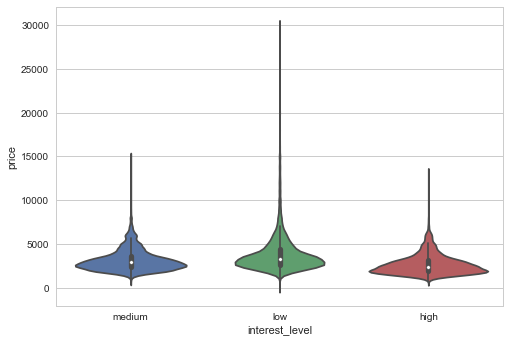

In [11]:
sns.violinplot(x="interest_level", y="price", data=train_clean_df);
plt.show()

Now we will explore the longitude and the langitude of the data set or in other words, we will focus on the location of the rental properties. Before plotting we will replace the marginal properties which lie beyond the 99% and 1% of the longitude values and beyound the 99% and 1% of the latitude values.

In [ ]:
sns.distplot(train_df['longitude'], kde=False, rug=True)
sns.plt.show()


In [3]:
lower_limit_lon = np.percentile(train_df.longitude.values, 1)
upper_limit_lon = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<lower_limit_lon] = lower_limit_lon
train_df['longitude'].ix[train_df['longitude']>upper_limit_lon] = upper_limit_lon

lower_limit_lat = np.percentile(train_df.latitude.values, 1)
upper_limit_lat = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<lower_limit_lat] = lower_limit_lat
train_df['latitude'].ix[train_df['latitude']>upper_limit_lat] = upper_limit_lat





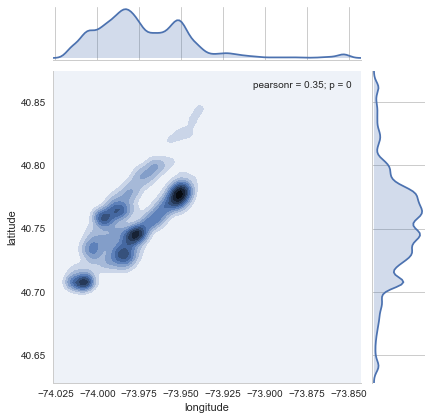

In [9]:
sns.jointplot(x="longitude", y="latitude", data=train_df, kind="kde");

sns.plt.show()

Based on the plot, we can see that the rental units are condensed around few areas and form kernels with high numbers of rental units offered in that areas. Based on the longitude and latitude values that we have plotted on the map, we can conclude that the information for rental units comes from New York and more specifically from Manhattan. In order to improve the visualization of the data, we will use Basemap.

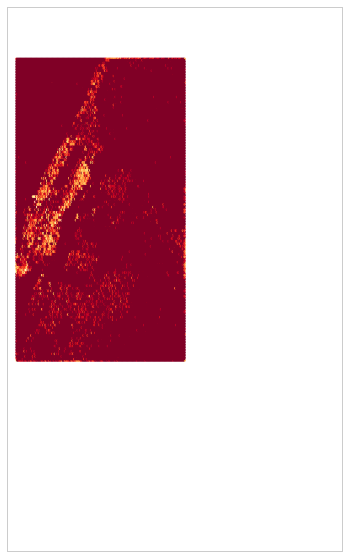

In [29]:

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='h')
x, y = m(train_df['longitude'].values, train_df['latitude'].values)
m.hexbin(x, y, gridsize=200,
         bins='log', cmap=cm.YlOrRd_r);

plt.show()

The Basemap plot confirms the observations that there are few areas with higher number of rental units. And between them there is an empty area with no units available for rent and that area corresponds to Central Park. As a next step we will transform the data longitude and latitude values into New York neighbourhoods. For that purpose we will use zillow data which contains information on each neighbourhood in NY. The neighbourhood is defined by the West, Est, South and North positions. Our purpose is to compare whether certain rental unit is within a defined region. If not, we will assign value "Other".

In [23]:
import shapefile

sf = shapefile.Reader("C:\\Users\\sevda\\Documents\\Data Lab\\Six sigma rental property\\ZillowNeighborhoods-NY\\ZillowNeighborhoods-NY.shp")

shapes = sf.shapes()
records = sf.records()

towns_values = [records[i][2] for i in range(len(records))]
neighb_values = [records[i][3] for i in range(len(records))]
west_values = [shapes[i].bbox[0] for i in range(len(records))]
south_values = [shapes[i].bbox[1] for i in range(len(records))]
east_values = [shapes[i].bbox[2] for i in range(len(records))]
north_values = [shapes[i].bbox[3] for i in range(len(records))]

west, south, east, north = -74.02, 40.64, -73.85, 40.86

neighbourhood_pd = pd.DataFrame({'Town' : towns_values,
                                 'Neighbourhood' : neighb_values,
                                 'West' : west_values,
                                 'South' : south_values,
                                 'East' : east_values,
                                 'North' : north_values})

neighbourhood_pd = neighbourhood_pd[neighbourhood_pd.Town == "New York"]
neighbourhood_pd = neighbourhood_pd.ix[(neighbourhood_pd.West >= west) & 
                                     (neighbourhood_pd.East <= east) & 
                                     (neighbourhood_pd.South >= south) & 
                                     (neighbourhood_pd.North <= north)]

neighbourhood_sorted_pd = neighbourhood_pd.sort_values(['West'])


neighbourhood_ls = []
for num in range(0, train_df.shape[0]):
    temp = neighbourhood_sorted_pd[(neighbourhood_sorted_pd.West<train_df.longitude.values[num]) &
                                   (neighbourhood_sorted_pd.East>train_df.longitude.values[num]) &
                                   (neighbourhood_sorted_pd.South<train_df.latitude.values[num]) &
                                   (neighbourhood_sorted_pd.North>train_df.latitude.values[num])]
    if temp.shape[0] > 0:
        neighbourhood_ls += [temp.Neighbourhood.values[0]]
    else:
        neighbourhood_ls += ["Other"]
    
train_df['neighbourhood'] = pd.Series(neighbourhood_ls, index=train_df.index)

We are now working with the initial data set plus one additional variable describing the data called "neighbourhood". Next, we will explore how the neighbourhood is related to the interest level of the rental unit.

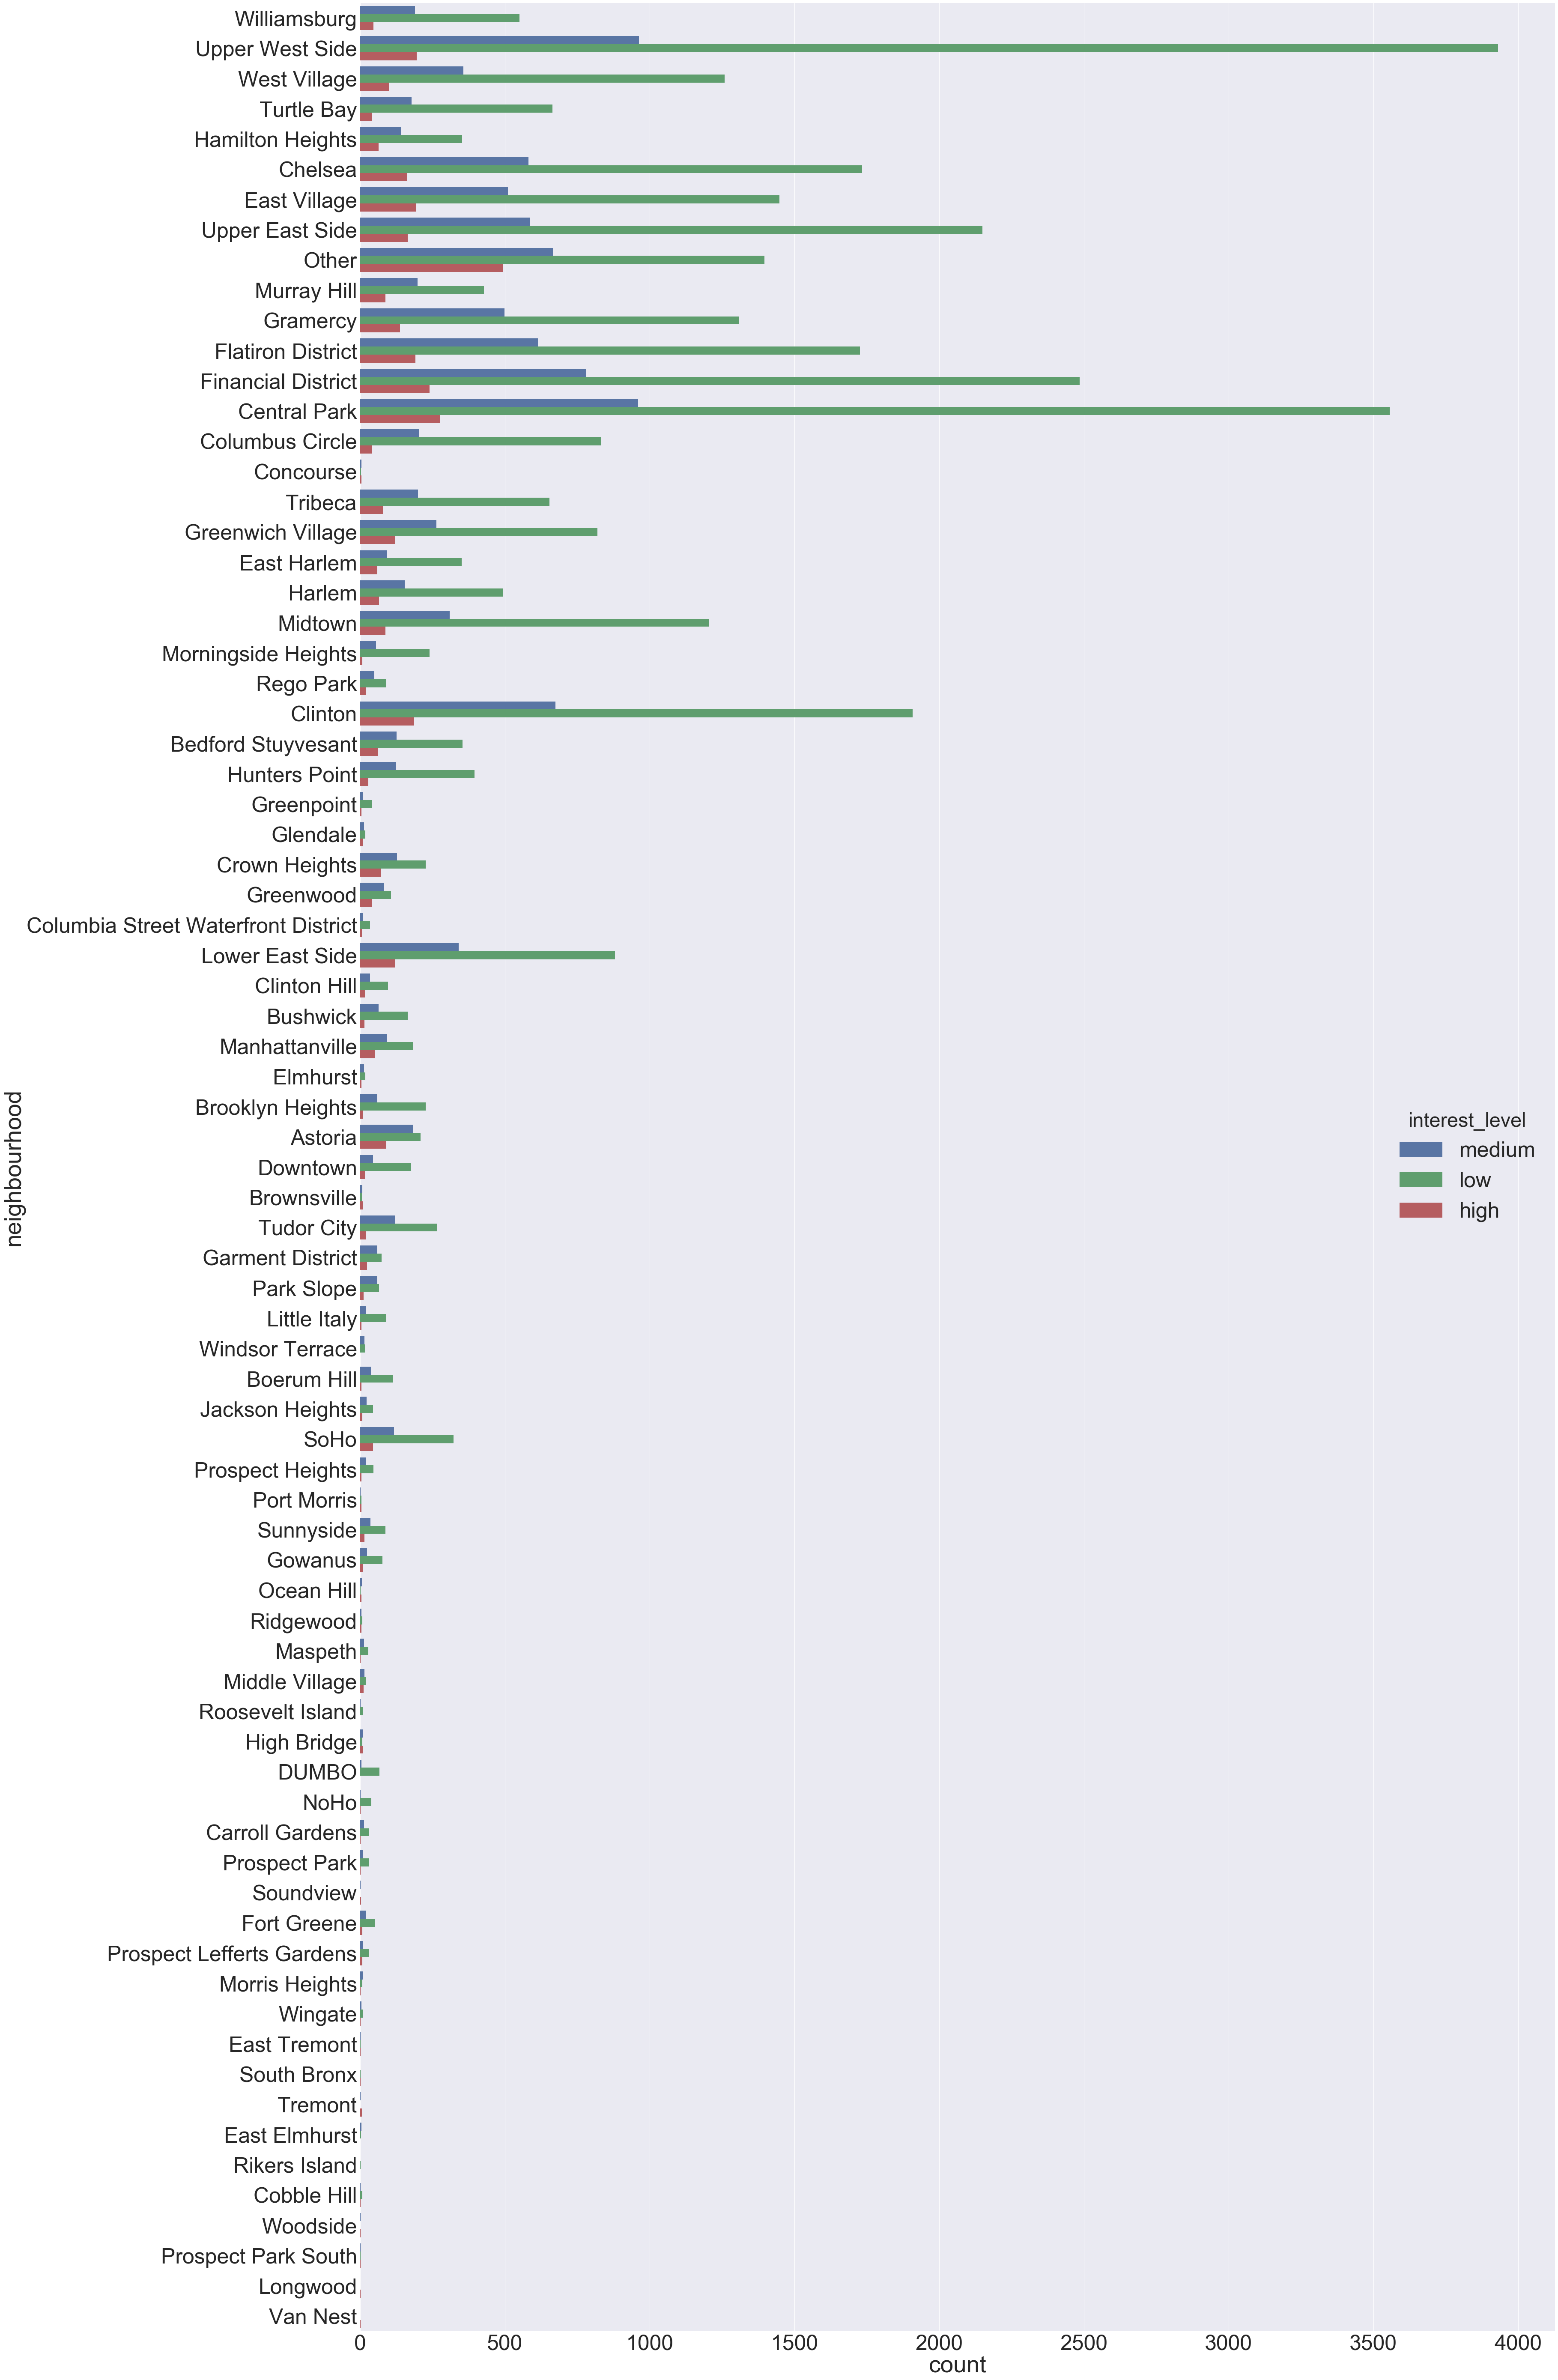

In [30]:
fig = plt.figure(figsize=(50,100))
ax = sns.countplot(y="neighbourhood", hue="interest_level", data=train_df)
sns.set(font_scale = 3)
sns.plt.show()

Based on the plot, we can see that certain neighbourhoods such as the one listed in the bottom part of the graph has almost no rental listings associated with them. Whiel other neighbourhoods such as UpperWest Side, Financial District and Central Park has significant number of listings. That also explains the previous plots showing the location of the listings. There were certain areas on the map wwith high density of points representing the listings. It is also interesting to notice that there are some difference in the listing's interest based on the neighbourhood. For example Chelsea and East village has comparable numebr of listings with Medium and High interest, however Chelsea gets more listing with low interest than East Village. Therefore the chances of having low interest is higher in Chelsea compared to East Village. There are also some locations where there are no listings with high level of interest such as the Morris Heights, Propsect Park and Dumbo neighbourhoods. In other neighbourhoods such as Greenwood and Park Slope, the number of low interest rentals is almost equal to the number of medium interest rentals which is in conrast to the majority of the neighbourhoods in which the low interest rentals are few times higher than the medium interest rentals. We can conclude that Greenwood and Park Slope generates higher level of interest compared to other neighbourhoods.

Another piece of information available for the rentals is photos. We will create a new variable containing the number of pictures available for a given unit and will explore how the number of pictures relate to the interest level.

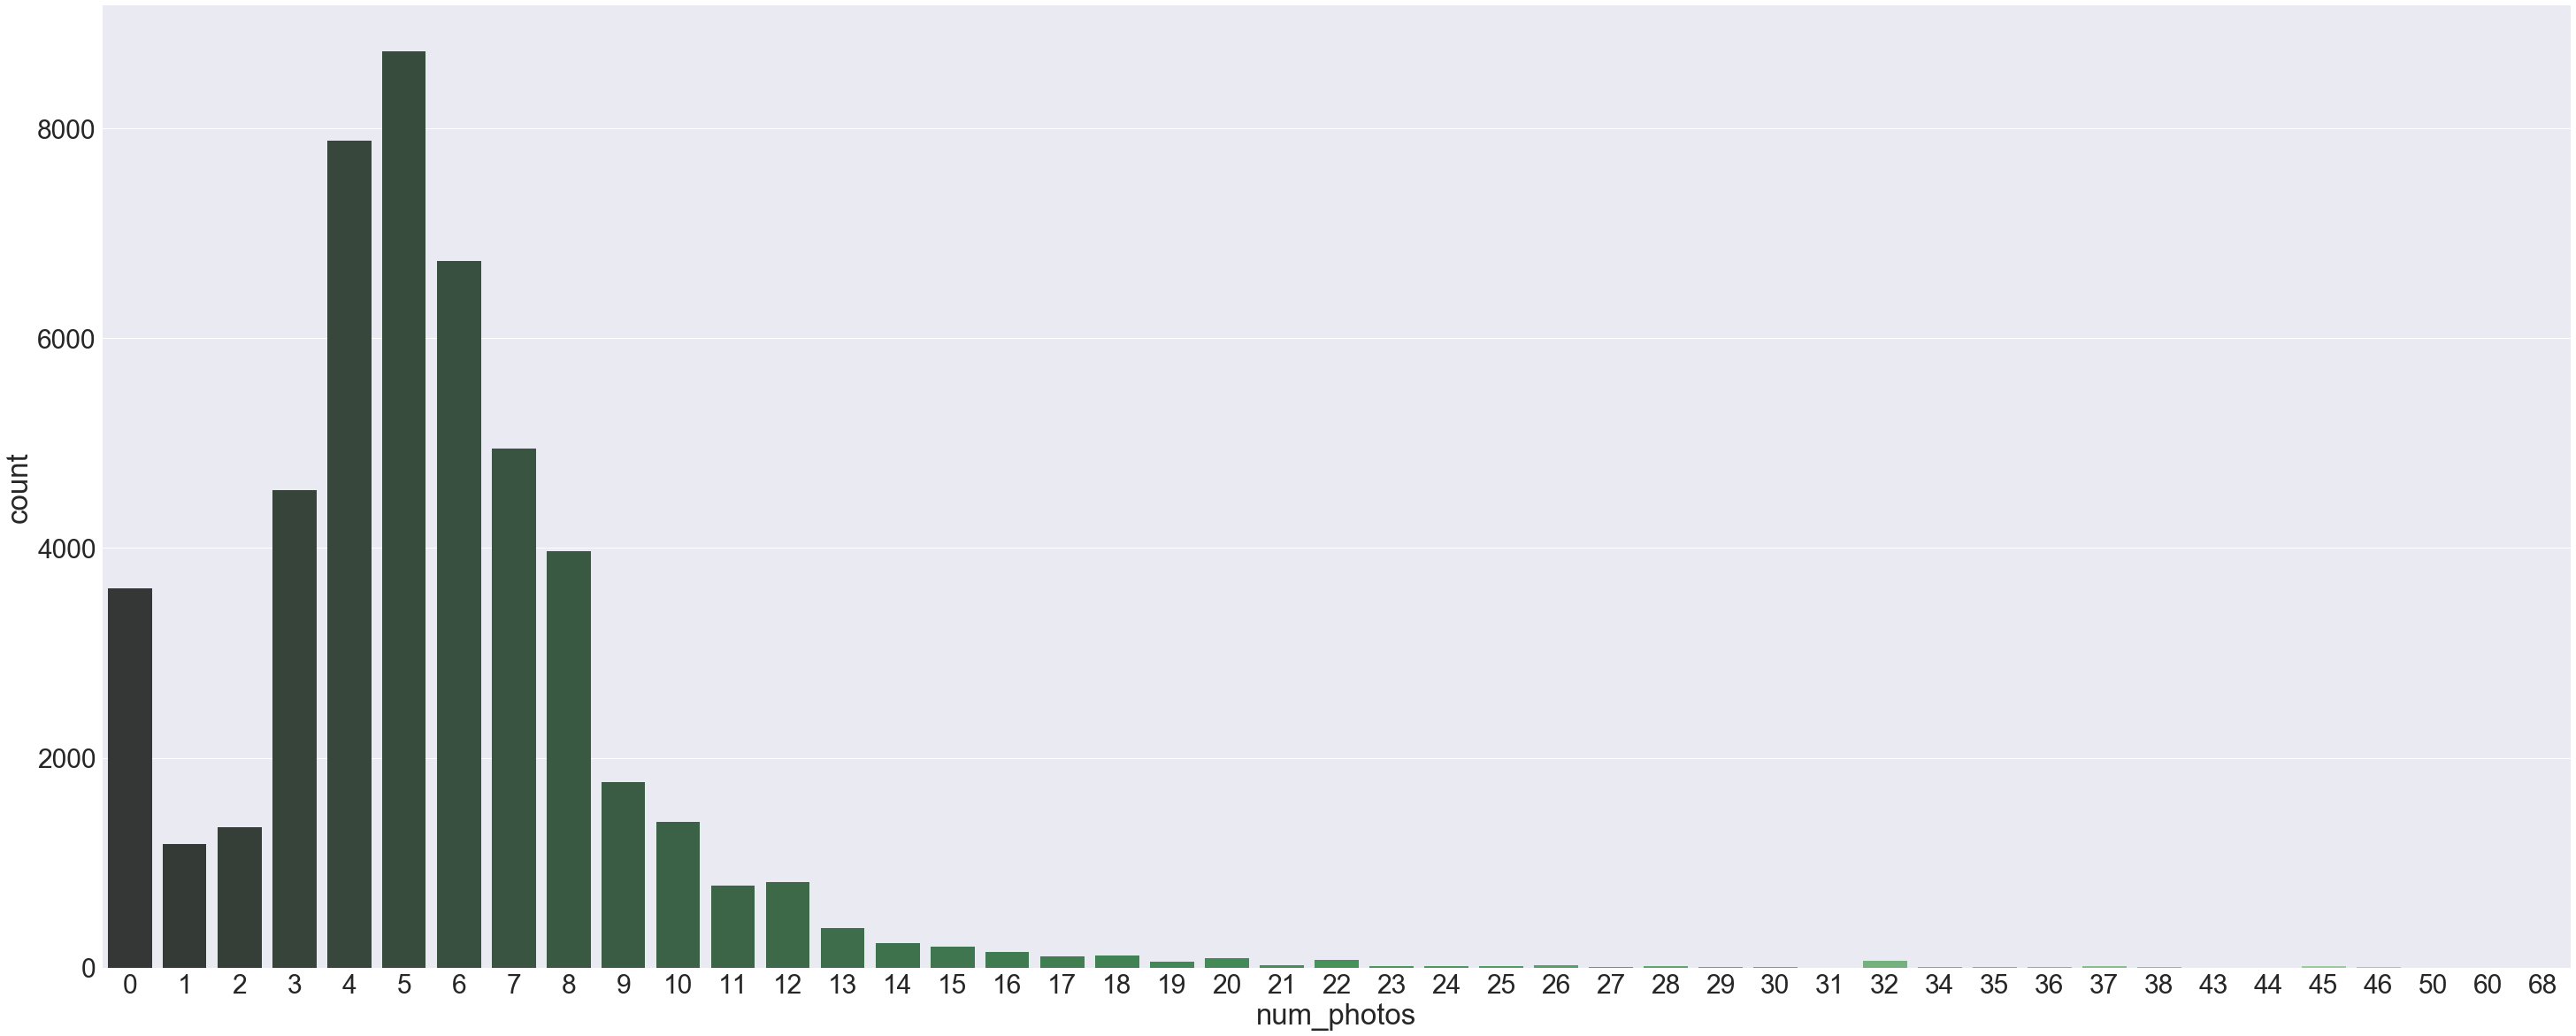

In [42]:
fig = plt.figure(figsize=(50,20))
train_df["num_photos"] = train_df.photos.apply(len)
sns.countplot(x="num_photos", data=train_df, palette="Greens_d")
sns.plt.show()

Based on the plot, we can see that the majority of the rental listings has between 3 and 8 photos. As a next step, we will explore through a graph the relationship between the number of photoes and the interest level of the listings.

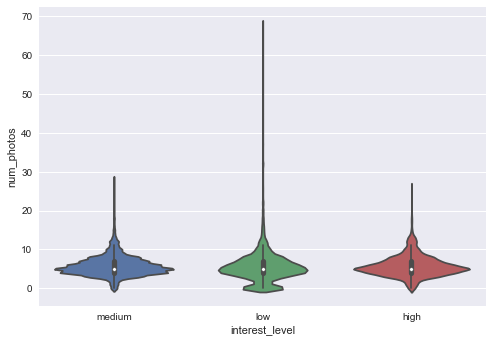

In [47]:
sns.violinplot(x="interest_level", y="num_photos", data=train_df)
sns.set(font_scale = 1)
sns.plt.show()

Based on the plot, we can see that higher number of photos doesn't correlate with higher interest level. for example there are some outliers with more than 30 photos for the listing which has still generated low interest level. Another observation is that listings with very low number of photoes (between 0 and 2) usually has low interest. When the number of photos are between 5 and 6 we can see that they are spread out among the three levels of interest almost equally. We can conclude that if the listing has very low or very high number of photos, there is high probability that the interest level is low.